In [1]:
using WAV
using GLMakie
using DSP

In [2]:
y, Fs, nbits, opts  = wavread("/Users/darwin/Downloads/Unknown-3.wav")
y = reshape(y, length(y));

In [3]:
y_pulses = vcat(y[600000:650000], (0.5+0.5rand()).*y[630000:650000], (0.5+0.5rand()).*y[630000:650000], (0.5+0.5rand()).*y[630000:650000]);

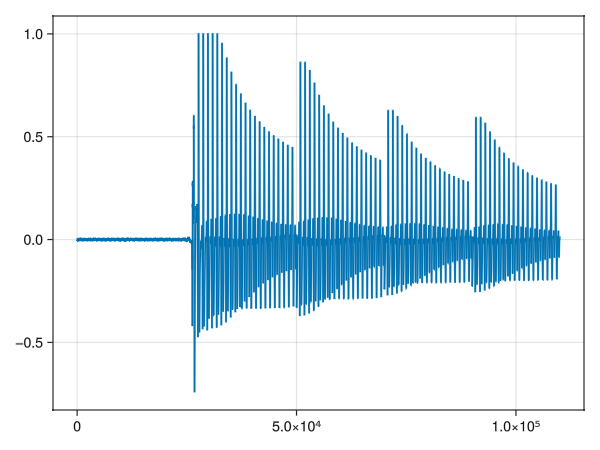

In [4]:
lines(y_pulses)

In [5]:
function detect_pluck(filtered_energy, fs, threshold, min_delay)
    delay_count = round(Int, min_delay*fs)
    last_pulse = -delay_count
    
    pulses = []
    prev = 0.0
    for (i,e) in enumerate(filtered_energy)
        Δ = e - prev
        prev = e
        if Δ > threshold
            if (i - last_pulse) > delay_count
                push!(pulses, i)
                last_pulse = i
            end
        end
    end
    return pulses
end

detect_pluck (generic function with 1 method)

In [6]:
response = Lowpass(10.0; fs = Fs)
design = Butterworth(4);
lp_filter = digitalfilter(response, design)
filtered = filt(lp_filter, y_pulses.^2);
plucks = detect_pluck(filtered, Fs, 0.001^2, 1/8)

4-element Vector{Any}:
 26560
 51179
 71352
 91142

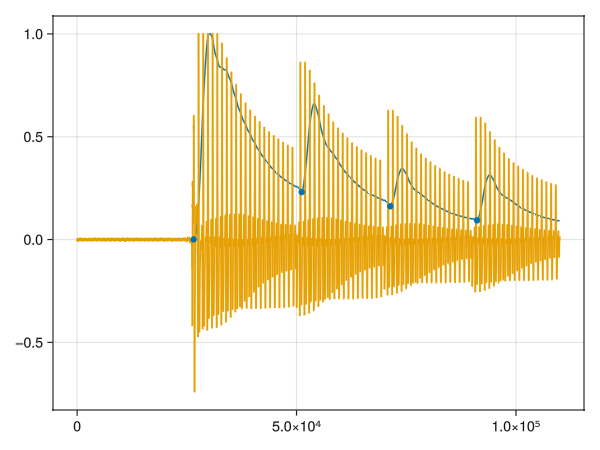

In [7]:
f = Figure()

ax = Axis(f[1, 1])
filtered ./= maximum(filtered)
lines!(ax, filtered)
lines!(ax, y_pulses)
scatter!(plucks, filtered[plucks])
f